## Wine Quality Data Visualization

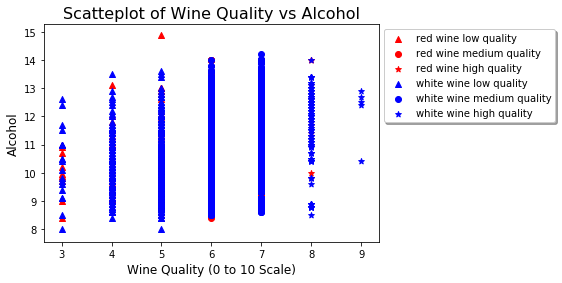

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

#import data files
red = pd.read_csv('./winequality-red.csv', sep=";")
white=pd.read_csv('./winequality-white.csv',sep=";")

#use the below function to further divide the wine's quality into low, medium, and high quality
def get_class(quality_col):
    class_col = []
    for i in range(len(quality_col)):
        q = quality_col[i]
        if 1<=q<=5:
            class_col.append("low quality")
        if 6<=q<=7:
            class_col.append("medium quality")
        if 8<=q<=10:
            class_col.append("high quality") 
    return class_col

red['class']= get_class(red["quality"])
white['class']= get_class(white["quality"])

#merge two wine types together
allwine=pd.concat([red,white])
#create a new column to store wine type
type_col=["white_wine"]*6497
for i in range(1599):
    type_col[i]="red_wine"
allwine["type"]=type_col

#plot individual group so that it will show as different markers grouped by class
winedict = {
    "red_low": [],
    "red_medium": [],
    "red_high": [],
    "blue_low": [],
    "blue_medium": [],
    "blue_high": [],
    
}
for wine_type, quality, alcohol in zip(allwine["type"], allwine["quality"], allwine["alcohol"]):
    if wine_type == "red_wine":
        if 1<=quality<=5:
            winedict["red_low"].append((quality, alcohol))
        if 6<=quality<=7:
            winedict["red_medium"].append((quality, alcohol))
        if 8<=quality<=10:
            winedict["red_high"].append((quality, alcohol))
    if wine_type == "white_wine":
        if 1<=quality<=5:
            winedict["blue_low"].append((quality, alcohol))
        if 6<=quality<=7:
            winedict["blue_medium"].append((quality, alcohol))
        if 8<=quality<=10:
            winedict["blue_high"].append((quality, alcohol))
plt.scatter([x for x, y in winedict["red_low"]], [y for x, y in winedict["red_low"]], 
            color = 'r', marker="^", label='red wine low quality')
plt.scatter([x for x, y in winedict["red_medium"]], [y for x, y in winedict["red_medium"]], 
            color = 'r', marker="o", label='red wine medium quality')
plt.scatter([x for x, y in winedict["red_high"]], [y for x, y in winedict["red_high"]], 
            color = 'r', marker="*", label='red wine high quality')
plt.scatter([x for x, y in winedict["blue_low"]], [y for x, y in winedict["blue_low"]], 
            color = 'b', marker="^", label='white wine low quality')
plt.scatter([x for x, y in winedict["blue_medium"]], [y for x, y in winedict["blue_medium"]], 
            color = 'b', marker="o", label='white wine medium quality')
plt.scatter([x for x, y in winedict["blue_high"]], [y for x, y in winedict["blue_high"]], 
            color = 'b', marker="*", label='white wine high quality')
plt.legend(loc='upper left', shadow=True, fontsize='medium', bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel("Wine Quality (0 to 10 Scale)", fontsize='large')
plt.ylabel("Alcohol",fontsize='large')
plt.title('Scatteplot of Wine Quality vs Alcohol',fontsize=16)
plt.show()

## News Group Data Visualization

##### Size of each category:

In [311]:
#import .mat file into python
from scipy.io import loadmat
data=loadmat('news20.mat')
newsgroups = data['newsgroups'][0]
#create a dictionary to store the 6 categories and the corresponding document index
category = {'comp':[],
            'rec':[],
            'sci':[],
            'misc':[],
            'politics':[],
            'religion':[]
    }
labels = data['labels']
for doc_id in range(len(labels)):
    label = labels[doc_id][0]-1
    group_name = newsgroups[label][0].strip()
    if group_name in ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                      'comp.sys.mac.hardware', 'comp.windows.x']:
        category['comp'].append(doc_id)
    elif group_name in ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']:
        category['rec'].append(doc_id)
    elif group_name in ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']:
        category['sci'].append(doc_id)
    elif group_name in ['misc.forsale']:
        category['misc'].append(doc_id)
    elif group_name in ['talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast']:
        category['politics'].append(doc_id)
    elif group_name in ['talk.religion.misc', 'alt.atheism', 'soc.religion.christian']:
        category['religion'].append(doc_id)
    else:
        print(group_name)


Comments: through the above code,a new categorical variable (category) was created to divide each document to the 6 categories.

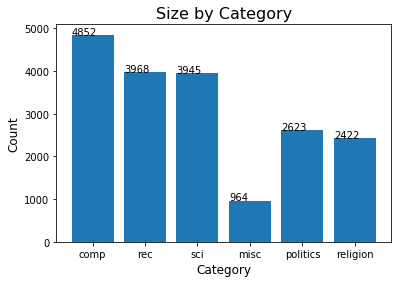

In [312]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(category))#the x locations for the groups
y = [len(category[k]) for k in category]
bars = plt.bar(x, y)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval)
plt.xticks(x, (k for k in category))
plt.xlabel("Category",fontsize="large")
plt.ylabel("Count",fontsize="large")
plt.title('Size by Category',fontsize=16)
plt.show()

##### Further breakdown of 6 categories:

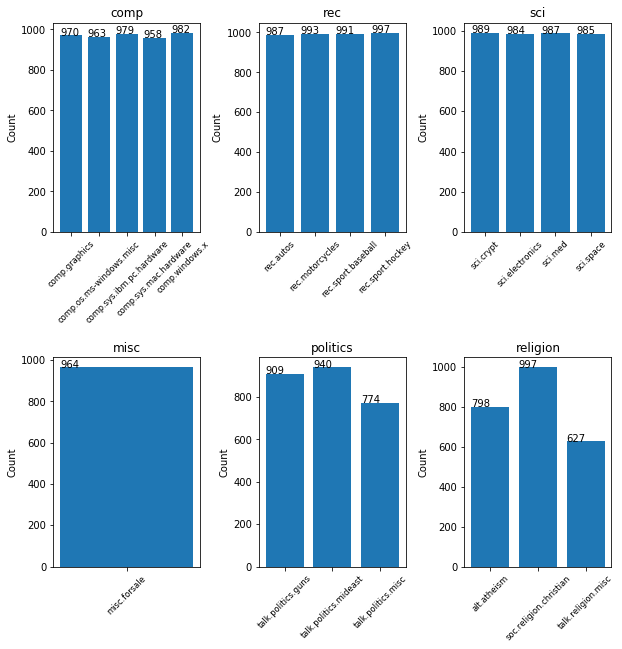

In [313]:
import matplotlib.pyplot as plt
import numpy as np
sub_category_count = {'comp':{},
            'rec':{},
            'sci':{},
            'misc':{},
            'politics':{},
            'religion':{}
    }
for doc_id in range(len(labels)):
    label = labels[doc_id][0]-1
    group_name = newsgroups[label][0].strip()
    if group_name in ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                      'comp.sys.mac.hardware', 'comp.windows.x']:
        sub_category_count['comp'][group_name] = sub_category_count['comp'].get(group_name, 0) + 1
    elif group_name in ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']:
        sub_category_count['rec'][group_name] = sub_category_count['rec'].get(group_name, 0) + 1
    elif group_name in ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']:
        sub_category_count['sci'][group_name] = sub_category_count['sci'].get(group_name, 0) + 1
    elif group_name in ['misc.forsale']:
        sub_category_count['misc'][group_name] = sub_category_count['misc'].get(group_name, 0) + 1
    elif group_name in ['talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast']:
        sub_category_count['politics'][group_name]=sub_category_count['politics'].get(group_name, 0)+1
    elif group_name in ['talk.religion.misc', 'alt.atheism', 'soc.religion.christian']:
        sub_category_count['religion'][group_name]=sub_category_count['religion'].get(group_name, 0)+1
    else:
        print(group_name)

plt.figure(figsize=(10,10))
bar_width = 0.8
subplot_positions = [231, 232, 233, 234, 235, 236]
for p, k in zip(subplot_positions, sub_category_count.keys()):
    plt.subplot(p)
    x = np.arange(len(sub_category_count[k]))
    y = [sub_category_count[k][subk]for subk in sub_category_count[k]]
    bars = plt.bar(x, y)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + .02, yval)
    plt.xticks(x, (subk for subk in sub_category_count[k]), rotation=45, fontsize='small')
    plt.ylabel("Count")
    plt.title(k)
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

##### Similarity/dissimilarity among different categories:

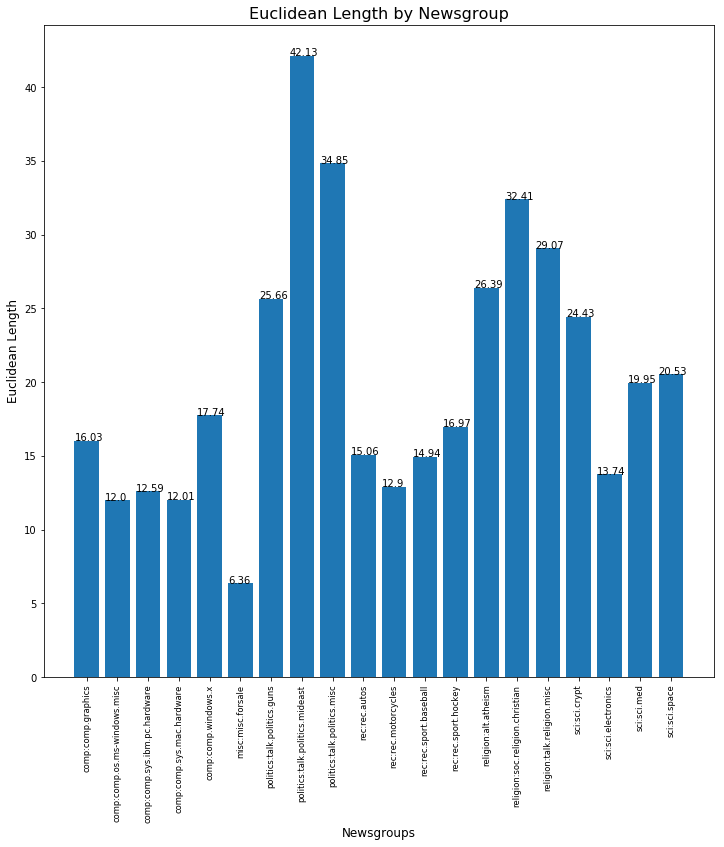

In [314]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
A = data['A']
labels = data['labels']
newsgroups=data['newsgroups'][0]
newsgroup_to_category = {}
for category in sub_category_count:
    for newsgroup in sub_category_count[category]:
        newsgroup_to_category[newsgroup] = category
newsgroup_id_name_zip=list(zip([i+1 for i in range(len(newsgroups))], 
                [newsgroup_to_category[newsgroup[0]]+":"+newsgroup[0] for newsgroup in newsgroups]))
newsgroup_id_name_zip=sorted(newsgroup_id_name_zip, key=lambda x: x[1])
m, n = A.shape
euclidean_len_by_group = []
for group_id, cate_newsgroup in newsgroup_id_name_zip:
    group_indices = np.argwhere(labels==group_id)
    sub_A = A[[r for r, c in group_indices],:]
    mean_vec_of_sub_A = sub_A.mean(axis=0)
    euclidean_length = LA.norm(mean_vec_of_sub_A)
    euclidean_len_by_group.append([euclidean_length, cate_newsgroup])
plt.figure(figsize=(12,12))
x = np.arange(len(euclidean_len_by_group))#the x locations for the groups

'''
y_xticks = []
for category in sub_category_count:
    tmp_y = [euclidean_len_by_group[newsgroup] for newsgroup in sub_category_count[category]]
    tmp_ticks = [category+":"+newsgroup for newsgroup in sub_category_count[category]]
    sorted_list = sorted(list(zip(tmp_y, tmp_ticks)), key=lambda x: x[0])
    y_xticks.extend(sorted_list)

y_xticks = sorted(y_xticks, key=lambda x: x[1])
'''
bars = plt.bar(x, [y for y, xtick in euclidean_len_by_group])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, round(yval, 2))
plt.xticks(x, (xtick for y, xtick in euclidean_len_by_group), rotation=90, fontsize='small')
plt.xlabel("Newsgroups",fontsize="large")
plt.ylabel("Euclidean Length",fontsize="large")
plt.title('Euclidean Length by Newsgroup',fontsize=16)
plt.show() 

Comments: this figure tells us the information related to the relative length of news of each newsgroup. Or in other words, newsgroups with higher Euclidean length has relatively higher number of counts of keywords (and thus potentially higher lengh of news) compared with newsgroups with lower Euclidean length. In our case, misc.forsale group has the lowest number of counts of keywords, while talk.politics.misc has the highest number of counts of keywords.

##### Relevancy between each group:

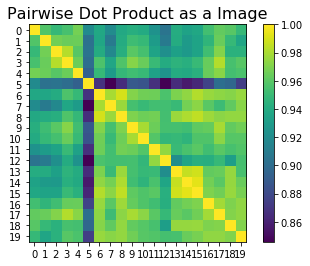

In [316]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from numpy import linalg as LA
A = data['A']
labels = data['labels']
m, n = A.shape
euclidean_len_by_group = {}
center_matrix = np.zeros((1,n))
for group_id, cate_newsgroup in newsgroup_id_name_zip:
    group_indices = np.argwhere(labels==group_id)
    sub_A = A[[r for r, c in group_indices],:]
    mean_vec_of_sub_A = sub_A.mean(axis=0)
    if not center_matrix.any():
        center_matrix = mean_vec_of_sub_A
        continue
    center_matrix = np.vstack((center_matrix,mean_vec_of_sub_A))

normed_center_matrix = normalize(center_matrix, axis=1, norm='l2')
dot_pro_matrix = np.empty((20,20))
row_num = np.size(normed_center_matrix,0)
for i in range(row_num):
    for j in range(row_num):
        dot_pro_matrix[i,j] = np.dot(normed_center_matrix[i,:], normed_center_matrix[j,:])
plt.imshow(dot_pro_matrix)
plt.colorbar()
plt.title('Pairwise Dot Product as a Image',fontsize=16)
plt.xticks(np.arange(20))
plt.yticks(np.arange(20))
plt.show()

Comments: This image tells us about the relevancy between each group, with lighter colour indicating higher relevancy, while darker colour indicating lower relevancy. This is why the diagnoal cells of the image have the lightest color (since it is the dot product of the group itself). Groups within the same category (i.e., rec, comp, religion etc.) are more relevant and thus shows lighter colour in the image, while groups among different categories are less relevant and thus shows darker colour in the image.

## USPS Zip Code Data:

#####  Find the size of each class:

In [ ]:
from scipy.io import loadmat
import numpy as np
data=loadmat('usps.mat')
Xtr = data['Xtr']
ytr = data['ytr']
Xtst = data['Xtst']
ytst = data['ytst']

#merge training data and test data
X = np.vstack((Xtr, Xtst))
y = np.vstack((ytr, ytst))

class_counts = []
for i in range(10):
    class_counts.append(np.count_nonzero(y == i))
bars = plt.bar(np.arange(10), class_counts)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval)
plt.xticks(np.arange(10))
plt.xlabel("Class",fontsize="large")
plt.ylabel("Count",fontsize="large")
plt.title('Data Size by Class',fontsize=16)
plt.show()

##### Averaged digits image:

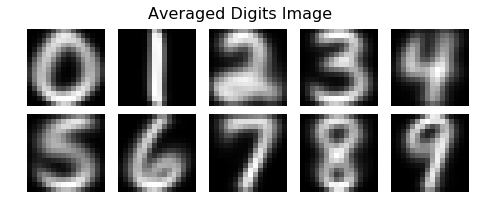

In [294]:
fig,ax = plt.subplots(2,5, figsize = [8,3])
fig.suptitle('Averaged Digits Image', fontsize=16)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(10):
    j, k = i//5, i%5
    cls_indices = np.argwhere(y==i)
    X_cls = X[[r for r, c in cls_indices],:]
    averaged_X_cls = np.mean(X_cls, axis=0)
    ax[j,k].imshow(averaged_X_cls.reshape((16,16)), cmap='gray')
    ax[j,k].axis('off')
plt.show()

##### Ten examples from each digit class:

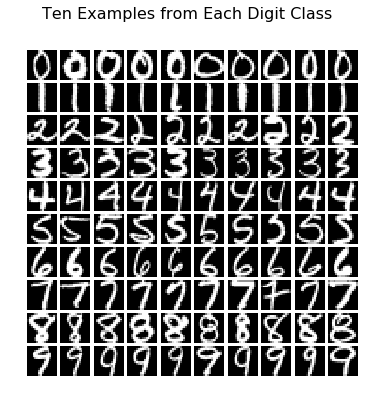

In [307]:
fig,ax = plt.subplots(10,10, figsize = [6,6])
fig.suptitle('Ten Examples from Each Digit Class', fontsize=16)
plt.subplots_adjust(hspace=0.1, wspace=0.002)
for i in range(10):
    cls_indices = np.argwhere(y==i)
    idx = np.random.randint(np.size(cls_indices, 0), size=10)
    X_cls = X[[r for r, c in cls_indices[idx,:]],:]
    for j in range(np.size(X_cls, 0)):
        ax[i,j].imshow(X_cls[j,:].reshape((16,16)), cmap='gray')
        ax[i,j].axis('off')
plt.show()